In [73]:
import pandas as pd
import numpy as np
import subprocess, re
import matplotlib.pyplot as plt

In [74]:
def writer(file,dictionary):
	data1=open(file,'w')
	for items in dictionary.items(): 
		data1.write("%s %s\n"%items)
	data1.close()

def calc(): 
	self.writer(self.ruta,self.data) 
	subprocess.getoutput(self.rutaG)

def find_command(self, COMMAND):
	const = 0.0 
	dato = subprocess.getoutput(COMMAND).strip() 
	# Elimina espacios en blanco al principio y al final
	if dato.replace(".", "").replace("e", "").replace("-", "").replace("+", "").isdigit():
		valor = float(dato)
		if (valor>=0):
		    const = valor
		else:
		    const = 1e10 
	else: 
		const = -1 
	return const

def extract_annihilation_channels_corrected(text):
    """
    Extrae solo los canales de aniquilación del texto
    """
    channels = []
    
    lines = text.split('\n')
    in_channels_section = False
    
    for line in lines:
        # Buscar el inicio de la sección de canales
        if "Relative contributions in % are displayed" in line:
            in_channels_section = True
            continue
        
        # Si estamos en la sección de canales, procesar líneas con %
        if in_channels_section and '%' in line and '->' in line:
            # Limpiar la línea y extraer porcentaje y canal
            clean_line = line.strip()
            
            # Usar expresión regular para extraer el porcentaje y el canal
            match = re.search(r'(\d+)%\s+(.+)', clean_line)
            if match:
                percentage = int(match.group(1))
                channel = match.group(2).strip()
                channels.append({
                    'percentage': percentage,
                    'channel': channel
                })
        
        # Salir de la sección si encontramos una línea vacía o otro patrón
        if in_channels_section and line.strip() == '':
            break
    
    return channels

def extract_dark_matter_info(text):
    """
    Extrae información general de la materia oscura
    """
    dm_info = {}
    
    # Buscar información del candidato de materia oscura
    dm_match = re.search(r"Dark matter candidate is '([^']+)' with spin=([^\s]+) mass=([\d.E+-]+)", text)
    if dm_match:
        dm_info['candidate'] = dm_match.group(1)
        dm_info['spin'] = dm_match.group(2)
        dm_info['mass'] = float(dm_match.group(3))
    
    # Buscar densidad relicta
    omega_match = re.search(r"Xf=([\d.e+-]+)\s+Omega=([\d.e+-]+)", text)
    if omega_match:
        dm_info['Xf'] = float(omega_match.group(1))
        dm_info['Omega'] = float(omega_match.group(2))
    
    return dm_info

def ejecutar(df_):
    df = df_.copy()
    n = len(df)
    df_con_canales = []
    for i in range(n):
        diccionario = df.iloc[i].to_dict()
        writer('data.dat', diccionario)
        rutaG = './main data.dat >temporal.dat'
        subprocess.getoutput(rutaG)
        with open('temporal.dat', 'r') as archivo:
            contenido = archivo.read()

        channels = extract_annihilation_channels_corrected(contenido)
        diccionario['channels'] = channels
        df_con_canales.append(diccionario)

    #df_con_canales = pd.DataFrame(df_con_canales)
    return pd.DataFrame(df_con_canales)

In [75]:
data_0p2 = pd.read_csv('scan_canales_0p2.txt')
data_0p2 = data_0p2.drop('Unnamed: 0', axis=1)
data_0p2_con_canales = ejecutar(data_0p2)
data_0p2_con_canales

,MAp,mphi,Mchi1,angle,gX,epsilon,ff,channels
0,1.571724,0.238308,0.196465,0.0005,2.506628,0.000086,0.062666,"[{'percentage': 97, 'channel': '~chi1 ~chi1 ->..."
1,7.080777,0.995205,0.885097,0.0005,2.506628,0.000037,0.062666,"[{'percentage': 100, 'channel': '~chi1 ~chi1 -..."
2,0.980691,0.424037,0.122586,0.0005,2.506628,0.004667,0.062666,"[{'percentage': 35, 'channel': '~chi1 ~chi2 ->..."
3,1.878770,0.477731,0.234846,0.0005,2.506628,0.009421,0.062666,"[{'percentage': 31, 'channel': '~chi1 ~chi2 ->..."
4,1.868911,0.346508,0.233614,0.0005,2.506628,0.009427,0.062666,"[{'percentage': 33, 'channel': '~chi1 ~chi2 ->..."
...,...,...,...,...,...,...,...,...
2276,0.017242,0.795716,0.002155,0.0005,2.506628,0.000097,0.062666,"[{'percentage': 96, 'channel': '~chi1 ~chi2 ->..."
2277,0.010497,0.084452,0.001312,0.0005,2.506628,0.000066,0.062666,"[{'percentage': 100, 'channel': '~chi1 ~chi2 -..."
2278,0.067470,6.868251,0.008434,0.0005,2.506628,0.000258,0.062666,"[{'percentage': 50, 'channel': '~chi1 ~chi2 ->..."
2279,0.048131,0.078691,0.006016,0.0005,2.506628,0.000175,0.062666,"[{'percentage': 51, 'channel': '~chi1 ~chi2 ->..."


In [76]:
data_0p4 = pd.read_csv('scan_canales_0p4.txt')
data_0p4 = data_0p4.drop('Unnamed: 0', axis=1)
data_0p4_con_canales = ejecutar(data_0p4)
data_0p4_con_canales

,MAp,mphi,Mchi1,angle,gX,epsilon,ff,channels
0,0.548348,0.091007,0.068543,0.0005,2.506628,0.001353,0.125331,"[{'percentage': 99, 'channel': '~chi1 ~chi1 ->..."
1,0.274109,0.046929,0.034264,0.0005,2.506628,0.001763,0.125331,"[{'percentage': 94, 'channel': '~chi1 ~chi1 ->..."
2,2.966640,0.451357,0.370830,0.0005,2.506628,0.000060,0.125331,"[{'percentage': 100, 'channel': '~chi1 ~chi1 -..."
3,0.199502,0.067916,0.024938,0.0005,2.506628,0.005027,0.125331,"[{'percentage': 50, 'channel': '~chi1 ~chi2 ->..."
4,0.311566,0.057976,0.038946,0.0005,2.506628,0.008350,0.125331,"[{'percentage': 50, 'channel': '~chi1 ~chi2 ->..."
...,...,...,...,...,...,...,...,...
1658,0.014596,0.250841,0.001824,0.0005,2.506628,0.000441,0.125331,"[{'percentage': 100, 'channel': '~chi1 ~chi2 -..."
1659,0.029014,0.097764,0.003627,0.0005,2.506628,0.000558,0.125331,"[{'percentage': 56, 'channel': '~chi1 ~chi2 ->..."
1660,0.023481,0.181645,0.002935,0.0005,2.506628,0.000460,0.125331,"[{'percentage': 54, 'channel': '~chi1 ~chi2 ->..."
1661,0.009146,0.210728,0.001143,0.0005,2.506628,0.000285,0.125331,"[{'percentage': 100, 'channel': '~chi1 ~chi2 -..."


In [77]:
data_0p2_con_canales['channels']

0       [{'percentage': 97, 'channel': '~chi1 ~chi1 ->...
1       [{'percentage': 100, 'channel': '~chi1 ~chi1 -...
2       [{'percentage': 35, 'channel': '~chi1 ~chi2 ->...
3       [{'percentage': 31, 'channel': '~chi1 ~chi2 ->...
4       [{'percentage': 33, 'channel': '~chi1 ~chi2 ->...
                              ...                        
2276    [{'percentage': 96, 'channel': '~chi1 ~chi2 ->...
2277    [{'percentage': 100, 'channel': '~chi1 ~chi2 -...
2278    [{'percentage': 50, 'channel': '~chi1 ~chi2 ->...
2279    [{'percentage': 51, 'channel': '~chi1 ~chi2 ->...
2280    [{'percentage': 50, 'channel': '~chi1 ~chi2 ->...
Name: channels, Length: 2281, dtype: object

In [78]:
def extract_channel_contributions(channels_list, target_channel):
    """
    Extrae la contribución porcentual de un canal específico
    """
    if not isinstance(channels_list, list):
        return 0
    
    for channel in channels_list:
        if target_channel in channel['channel']:
            return channel['percentage']
    return 0

def extract_all_contributions(channels_list):
    """
    Extrae todas las contribuciones en un diccionario
    """
    if not isinstance(channels_list, list):
        return {'chi1_chi1': 0, 'chi1_chi2': 0, 'chi2_chi2': 0}
    
    contributions = {
        'chi1_chi1': 0,
        'chi1_chi2': 0, 
        'chi2_chi2': 0
    }
    
    for channel in channels_list:
        channel_str = channel['channel']
        if '~chi1 ~chi1' in channel_str:
            contributions['chi1_chi1'] = channel['percentage']
        elif '~chi1 ~chi2' in channel_str:
            contributions['chi1_chi2'] = channel['percentage']
        elif '~chi2 ~chi2' in channel_str:
            contributions['chi2_chi2'] = channel['percentage']
    
    return contributions

def elementos_graficos(label1,label2):
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16, framealpha=0.9, loc='best')
    plt.xlim(0.9, 1100)
    plt.ylim(1e-12, 1e-6)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.ylabel(label2, size=22)
    plt.xlabel(label1, size=22)

In [79]:
# Aplicar la función a cada fila del DataFrame
data_0p2_con_canales[['contrib_chi1_chi1', 'contrib_chi1_chi2', 'contrib_chi2_chi2']] = data_0p2_con_canales['channels'].apply(
    lambda x: pd.Series(extract_all_contributions(x))
)

data_0p2_con_canales[['Mchi1', 'epsilon', 'mphi', 'contrib_chi1_chi1', 'contrib_chi1_chi2', 'contrib_chi2_chi2']]

,Mchi1,epsilon,mphi,contrib_chi1_chi1,contrib_chi1_chi2,contrib_chi2_chi2
0,0.196465,0.000086,0.238308,97,0,3
1,0.885097,0.000037,0.995205,100,0,0
2,0.122586,0.004667,0.424037,0,8,0
3,0.234846,0.009421,0.477731,2,8,0
4,0.233614,0.009427,0.346508,0,8,0
...,...,...,...,...,...,...
2276,0.002155,0.000097,0.795716,0,4,0
2277,0.001312,0.000066,0.084452,0,100,0
2278,0.008434,0.000258,6.868251,0,12,0
2279,0.006016,0.000175,0.078691,0,11,0


In [95]:
data_0p2_con_canales.to_csv('analisisCanales_Delta0p2_alpha0p5.csv')

In [88]:
y_data1 = data_0p2_con_canales[data_0p2_con_canales['contrib_chi1_chi2'] >= 50]
y_data2 = data_0p2_con_canales[data_0p2_con_canales['contrib_chi1_chi1'] >= 50]

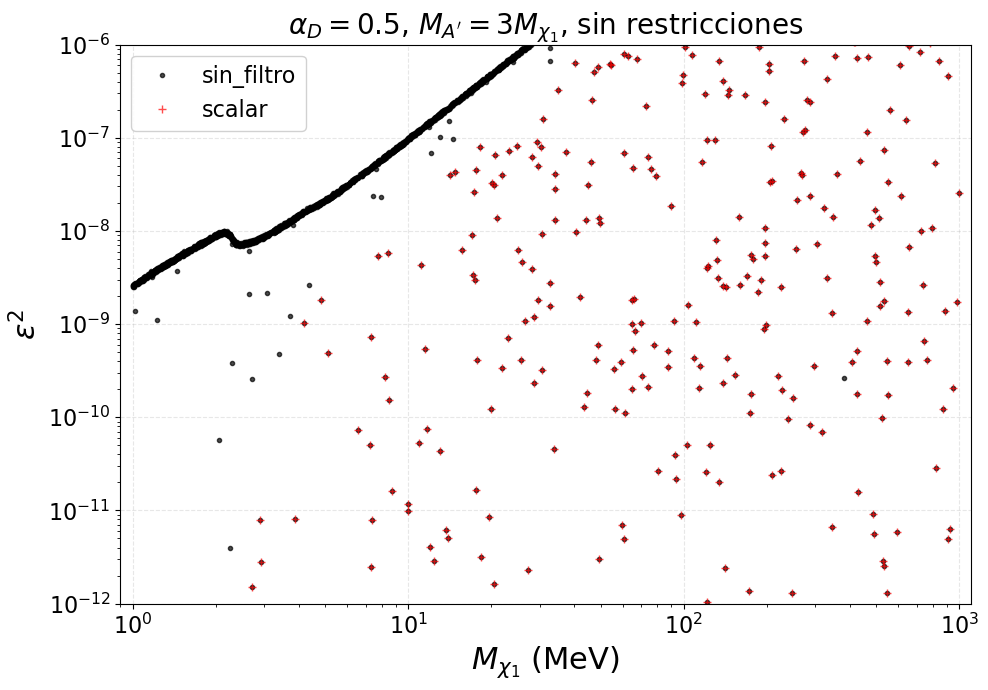

In [94]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(data_0p2_con_canales.Mchi1*1e3, data_0p2_con_canales.epsilon**2, 
         '.', color='black', markersize=6, alpha=0.7, label=r'sin_filtro')
plt.plot(y_data2.Mchi1*1e3, y_data2.epsilon**2, 
         '+', color='red', markersize=6, alpha=0.7, label=r'scalar')
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 3 M_{\chi_{1}}$, sin restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
#plt.text(5, 1e-9, r'DUNE', fontsize=12, color='black', rotation=25)
#plt.savefig(f'{pathImagenes}alpha0p5_R3_sin_restricciones.jpg', dpi=300)
plt.show()

In [97]:
# Aplicar la función a cada fila del DataFrame
data_0p4_con_canales[['contrib_chi1_chi1', 'contrib_chi1_chi2', 'contrib_chi2_chi2']] = data_0p4_con_canales['channels'].apply(
    lambda x: pd.Series(extract_all_contributions(x))
)

data_0p4_con_canales[['Mchi1', 'epsilon', 'mphi', 'contrib_chi1_chi1', 'contrib_chi1_chi2', 'contrib_chi2_chi2']]

,Mchi1,epsilon,mphi,contrib_chi1_chi1,contrib_chi1_chi2,contrib_chi2_chi2
0,0.068543,0.001353,0.091007,99,0,0
1,0.034264,0.001763,0.046929,94,2,0
2,0.370830,0.000060,0.451357,100,0,0
3,0.024938,0.005027,0.067916,0,12,0
4,0.038946,0.008350,0.057976,0,12,0
...,...,...,...,...,...,...
1658,0.001824,0.000441,0.250841,0,100,0
1659,0.003627,0.000558,0.097764,0,44,0
1660,0.002935,0.000460,0.181645,0,46,0
1661,0.001143,0.000285,0.210728,0,100,0


In [98]:
data_0p4_con_canales.to_csv('analisisCanales_Delta0p4_alpha0p5.csv')